In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# source
# https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-visualization-with-python-3

In [2]:
# 使用美国夏威夷莫纳罗亚天文台的连续空气样本中的大气CO2数据集
# 该数据集从1958年3月至2001年12月收集了二氧化碳样本
data = sm.datasets.co2.load_pandas()
co2 = data.data
print(co2.head(5))

co2
1958-03-29  316.1
1958-04-05  317.3
1958-04-12  317.6
1958-04-19  317.5
1958-04-26  316.4


In [3]:
co2.index

DatetimeIndex(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19',
               '1958-04-26', '1958-05-03', '1958-05-10', '1958-05-17',
               '1958-05-24', '1958-05-31',
               ...
               '2001-10-27', '2001-11-03', '2001-11-10', '2001-11-17',
               '2001-11-24', '2001-12-01', '2001-12-08', '2001-12-15',
               '2001-12-22', '2001-12-29'],
              dtype='datetime64[ns]', length=2284, freq='W-SAT')

In [4]:
# 使用每月平均值来替代计算
y = co2['co2'].resample('MS').mean()
y.head(5)

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01           NaN
1958-07-01    315.625000
Freq: MS, Name: co2, dtype: float64

In [5]:
y['1990':]

1990-01-01    353.650
1990-02-01    354.650
1990-03-01    355.480
1990-04-01    356.175
1990-05-01    357.075
               ...   
2001-08-01    369.425
2001-09-01    367.880
2001-10-01    368.050
2001-11-01    369.375
2001-12-01    371.020
Freq: MS, Name: co2, Length: 144, dtype: float64

In [6]:
y = y.fillna(y.bfill())

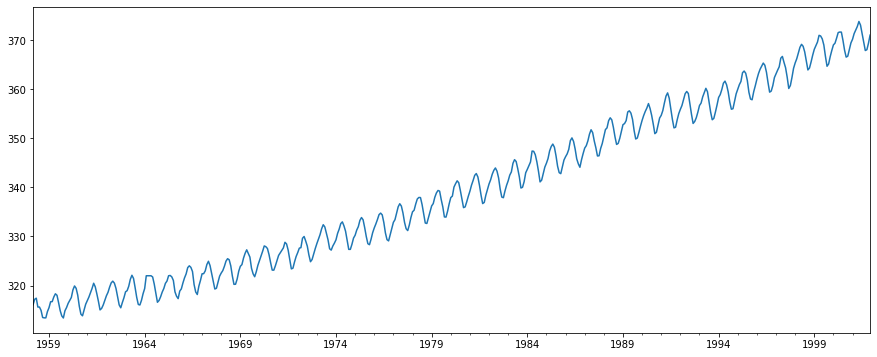

In [7]:
y.plot(figsize=(15,6))
plt.show()

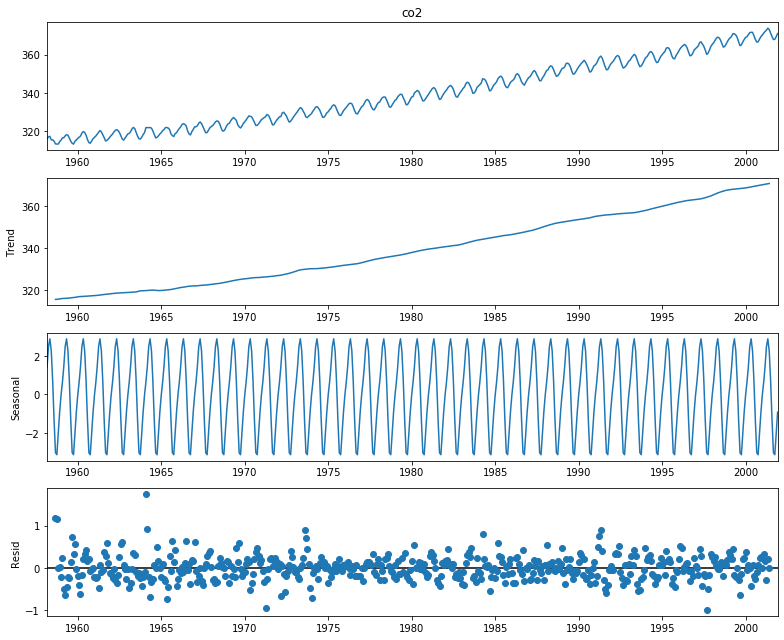

In [8]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()